In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import math
import scipy.fft as fft
from functools import partial
from scipy import signal

In [22]:
sampling = 0.01

plt.rcParams['figure.figsize'] = [8, 3]
plt.rcParams['figure.dpi'] = 100

x = np.arange(-4, 4, sampling)

In [131]:
def lowPassFilter2(w, x):
    return np.exp(1j*np.pi*x/w/2) if np.fabs(x) <= w else 0.0
def lowPassFilter(w, x):
    return 1.0 if np.fabs(x) <= w else 0.0
def flipAtOrigin(data):
    tmp = np.split(data, 2)
    return np.concatenate([tmp[1], tmp[0]])

In [132]:
def sin3(x):
    return np.sin(2*np.pi*x)+np.sin(2*np.pi*9*x)*0.1
def sin3b(x):
    return np.sin(2*np.pi*x)

In [133]:
freqAxis = np.fft.fftfreq(len(x), d=sampling)
halfFreqAxis = freqAxis[:len(freqAxis)//2]

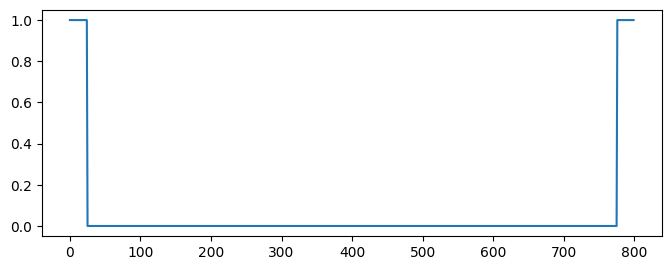

In [134]:
filterData = np.vectorize(partial(lowPassFilter, 3), otypes=[np.complex128])(freqAxis)
plt.plot(np.abs(filterData[:]), label = "фурье ид. фильтра (abs)")

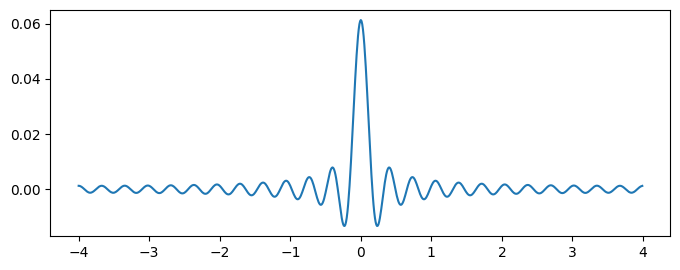

In [140]:
fil = np.fft.ifft(filterData)
plt.plot(x, np.real(flipAtOrigin(fil)))

In [136]:
data = np.vectorize(sin3)(x)
data2 = np.vectorize(sin3b)(x)

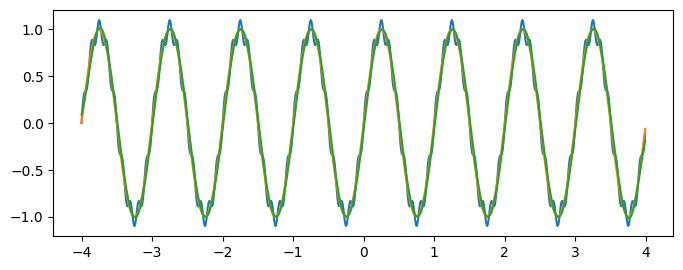

In [138]:
plt.plot(x, data)
plt.plot(x, data2)

filtered = np.convolve(flipAtOrigin(fil), data, 'same')
plt.plot(x, np.real(filtered))